## PAW wavelet decomposition

In [1]:
prefix = '/home/ines/repositories/'
prefix = '/Users/ineslaranjeira/Documents/Repositories/'

In [2]:
""" 
IMPORTS
"""
import os
os.environ["JAX_PLATFORM_NAME"] = "cpu"
import numpy as np
import pandas as pd
from one.api import ONE
from matplotlib import pyplot as plt
from scipy import stats

# Get my functions
from functions import idxs_from_files, get_speed
one = ONE(mode='remote')

In [3]:
""" 
LOAD DATA AND PARAMETERS
"""
# LOAD DATA

data_path = prefix + 'representation_learning_variability/paper-individuality/data/design_matrices/'
# data_path = prefix + 'representation_learning_variability/paper-individuality/data/temp/'

results_path = prefix + 'representation_learning_variability/paper-individuality/data/paw_wavelets/'
all_files = os.listdir(data_path)
design_matrices = [item for item in all_files if 'design_matrix' in item and 'standardized' not in item]
idxs, mouse_names = idxs_from_files(design_matrices)

data_path = prefix + 'representation_learning_variability/paper-individuality/fig1_segmentation/'
# states_file = pd.read_parquet(data_path+'states_trial_type_5k_5_09-24-2025')
states_file = pd.read_parquet(data_path+'states_trial_type_09-29-2025')

In [4]:
# Loop through animals
sessions_to_process = []

for m, mat in enumerate(idxs):
    mouse_name = mat[37:]
    session = mat[:36]
    sessions_to_process.append((session))

len(sessions_to_process)

218

In [5]:
paw_states = [['000', '010', '001', '011'], ['100', '110', '101', '111'], ['200', '210', '201', '211'],
              ['300', '310', '301', '311'], ['400', '410',  '401', '411'],
              ['500', '510', '501', '511'], ['600', '610', '601', '611'],
              ['700', '710', '701', '711']]

# Paw wavelets

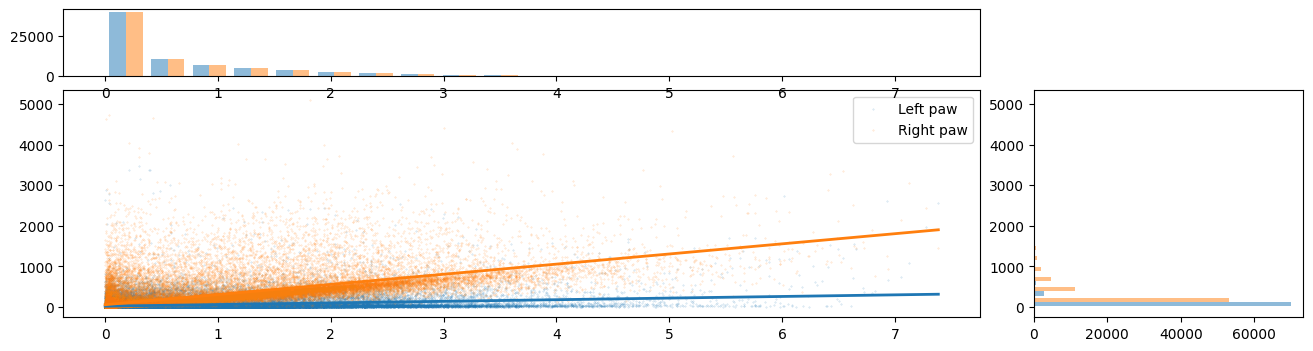

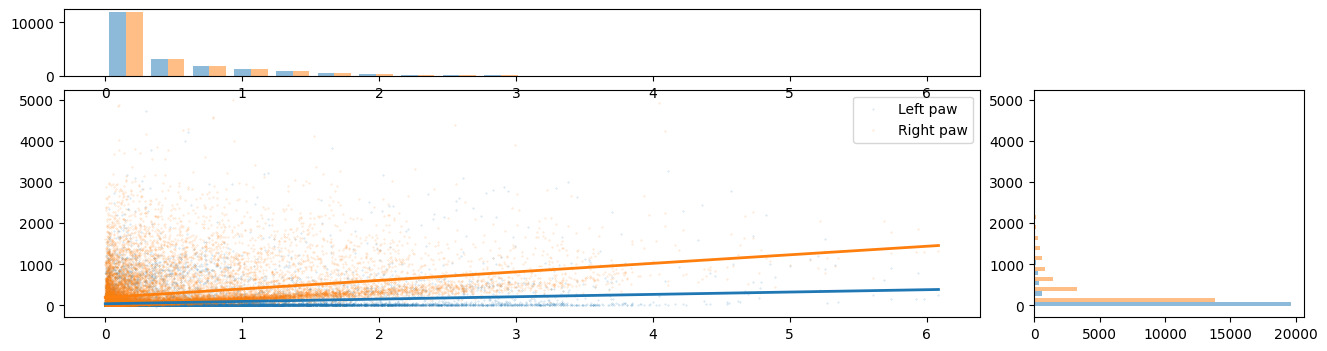

KeyboardInterrupt: 

In [ ]:
for m, mat in enumerate(sessions_to_process[:3]):

    # file_path = one.eid2path(mat)
    # if prefix == '/home/ines/repositories/':
    #     mouse_name = file_path.parts[8]
    # else:
    #     mouse_name = file_path.parts[7]

    # session = mat
    # filename = data_path + "design_matrix_" + str(session) + '_'  + mouse_name
    # design_matrix = pd.read_parquet(filename)
    design_matrix = states_file.loc[states_file.session==mat]

    left_speeds = get_speed(design_matrix, design_matrix['Bin'], 'left', 60, split=False, feature='l_paw')
    right_speeds = get_speed(design_matrix, design_matrix['Bin'], 'right', 60, split=False, feature='r_paw')

    # Create figure and grid
    # fig = plt.figure(figsize=(6, 6))
    # fig, ax = plt.subplots(figsize=(12, 8), nrows=2, ncols=2)
    fig = plt.figure(figsize=(16, 4))
    outer_gs = fig.add_gridspec(4, 16, wspace=0.4, hspace=0.3)
    for e, epoch in enumerate(['Pre-quiescence', 'Quiescence', 'Choice', 'ITI']):
        
        # identifiable_states = np.array(design_matrix['identifiable_states'])
        epochs = np.array(design_matrix['broader_label'])
        hvor = np.where(epochs==epoch)[0]
        x = np.array(np.abs(design_matrix['avg_wheel_vel']))[hvor]
        y1 = left_speeds[1][hvor]
        y2 = right_speeds[1][hvor]

        grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
        main_ax = fig.add_subplot(grid[1:4, 0:3])
        x_hist = fig.add_subplot(grid[0, 0:3], sharex=main_ax)
        y_hist = fig.add_subplot(grid[1:4, 3], sharey=main_ax)

        # --- Scatter (two hues) ---
        main_ax.scatter(x, y1, alpha=0.3, s=.1, label='Left paw', color='C0')
        main_ax.scatter(x, y2, alpha=0.3, s=.1, label='Right paw', color='C1')

        # --- Fit and plot regression lines ---
        for x, y, color in [(x, y1, 'C0'), (x, y2, 'C1')]:
            slope, intercept = np.polyfit(x, y, 1)
            xs = np.linspace(x.min(), x.max(), 100)
            ys = slope * xs + intercept
            main_ax.plot(xs, ys, color=color, linewidth=2)
        main_ax.legend()

        # --- Marginal histograms ---
        x_hist.hist([x, x], bins=20, color=['C0', 'C1'], alpha=0.5)
        y_hist.hist([y1, y2], bins=20, color=['C0', 'C1'], alpha=0.5, orientation='horizontal')

        # Clean up axes
        # x_hist.set_xticks([])
        # y_hist.set_yticks([])

        # x_hist.set_xlim([])
        # y_hist.set_ylim([])

        plt.show()

In [ ]:
def plot_all(design_matrix, left_speeds, right_speeds):
    # Parameters
    n_rows = 8
    n_cols = 4

    # Create figure
    fig = plt.figure(figsize=(20, 18))  # adjust height for 7 rows
    outer_gs = fig.add_gridspec(nrows=4 * n_rows, ncols=4 * n_cols, hspace=0.5, wspace=0.4)

    for e, epoch in enumerate(['Pre-quiescence', 'Quiescence', 'Choice', 'ITI']):

        for p, paw in enumerate(paw_states):

            identifiable_states = np.array(design_matrix['identifiable_states'])
            epochs = np.array(design_matrix['broader_label'])

            hvor = np.where((epochs==epoch) & (np.isin(identifiable_states, paw)))[0]
            x = np.array(np.abs(design_matrix['avg_wheel_vel']))[hvor]
            y1 = left_speeds[1][hvor]
            y2 = right_speeds[1][hvor]

            # Compute grid coordinates
            row_start = p * 4
            row_end = row_start + 4
            col_start = e * 4
            col_end = col_start + 4

            # Define axes for scatter and marginals
            main_ax = fig.add_subplot(outer_gs[row_start+1:row_end, col_start:col_end-1])
            x_hist = fig.add_subplot(outer_gs[row_start, col_start:col_end-1], sharex=main_ax)
            y_hist = fig.add_subplot(outer_gs[row_start+1:row_end, col_end-1], sharey=main_ax)

            # --- Main scatter ---
            main_ax.scatter(x, y1, s=.1, color='C0', alpha=0.3)
            main_ax.scatter(x, y2,s=.1,  color='C1', alpha=0.3)

            # --- Regression lines ---
            try:
                for xi, yi, color in [(x, y1, 'C0'), (x, y2, 'C1')]:
                    slope, intercept = np.polyfit(xi, yi, 1)
                    xs = np.linspace(xi.min(), xi.max(), 100)
                    main_ax.plot(xs, slope * xs + intercept, color=color, lw=2)
            except:
                print('')

            # --- Marginals ---
            x_hist.hist([x, x], bins=15, color=['C0', 'C1'], alpha=0.5)
            y_hist.hist([y1, y2], bins=15, color=['C0', 'C1'], alpha=0.5, orientation='horizontal')

            # --- Aesthetics ---
            x_hist.set_xticks([])
            y_hist.set_yticks([])
            main_ax.set_xticklabels([])
            main_ax.set_yticklabels([])
            if paw == n_rows - 1:
                main_ax.set_xlabel(f"Epoch {epoch+1}")
            if epoch == 0:
                main_ax.set_ylabel(f"Paw {paw+1}")

    # Title and layout
    mouse_name = list(design_matrix['mouse_name'])[0]
    session = list(design_matrix['session'])[0]
    fig.suptitle(mouse_name+' '+session, fontsize=16, y=0.93)
    plt.show()

In [10]:
def plot_all(design_matrix, left_speeds, right_speeds):
    # Parameters
    n_rows = 1
    n_cols = 8

    # Create figure
    # fig = plt.figure(figsize=(20, 18))  # adjust height for 7 rows
    fig = plt.figure(figsize=(20, 3))  # adjust height for 7 rows
    outer_gs = fig.add_grfilename grid coordinates
        row_start = 0 * 4
        row_end = row_start + 4
        col_start = p * 4
        col_end = col_start + 4

        # Define axes for scatter and marginals
        main_ax = fig.add_subplot(outer_gs[row_start+1:row_end, col_start:col_end-1])
        x_hist = fig.add_subplot(outer_gs[row_start, col_start:col_end-1], sharex=main_ax)
        y_hist = fig.add_subplot(outer_gs[row_start+1:row_end, col_end-1], sharey=main_ax)

        # --- Main scatter ---
        main_ax.scatter(x, y1, s=.1, color='C0', alpha=0.05)
        main_ax.scatter(x, y2,s=.1,  color='C1', alpha=0.05)

        # --- Regression lines ---
        try:
            for xi, yi, color in [(x, y1, 'C0'), (x, y2, 'C1')]:
                slope, intercept = np.polyfit(xi, yi, 1)
                xs = np.linspace(xi.min(), xi.max(), 100)
                main_ax.plot(xs, slope * xs + intercept, color=color, lw=2)
        except:
            print('')

        # --- Marginals ---
        x_hist.hist([x, x], bins=15, color=['C0', 'C1'], alpha=0.5)
        y_hist.hist([y1, y2], bins=15, color=['C0', 'C1'], alpha=0.5, orientation='horizontal')

        # --- Aesthetics ---
        x_hist.set_xticks([])
        y_hist.set_yticks([])
        main_ax.set_xticklabels([])
        main_ax.set_yticklabels([])
        if paw == n_rows - 1:
            main_ax.set_xlabel(f"Epoch {epoch+1}")
        # if epoch == 0:
        #     main_ax.set_ylabel(f"Paw {paw+1}")

    # Title and layout
    mouse_name = list(design_matrix['mouse_name'])[0]
    session = list(design_matrix['session'])[0]
    fig.suptitle(mouse_name+' '+session, fontsize=16, y=0.93)
    plt.show()

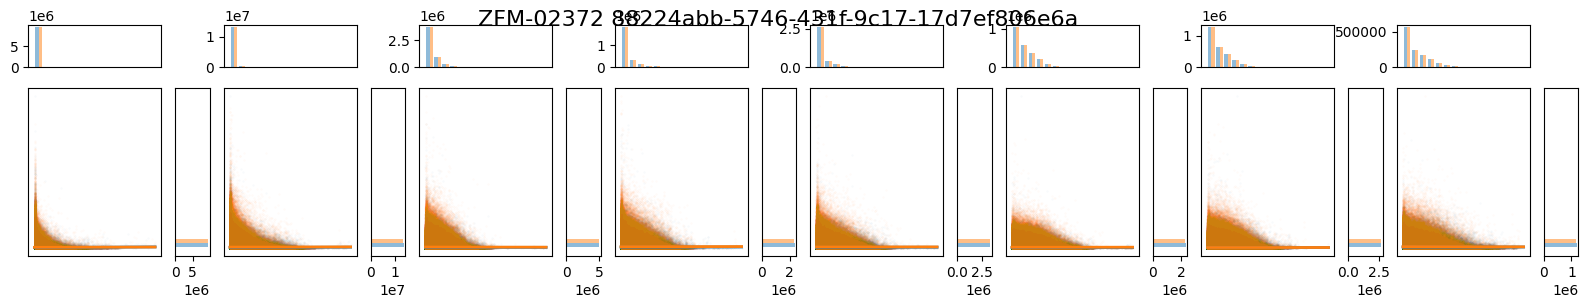

9b528ad0-4599-4a55-9148-96cc1d93fb24_NR_0019


In [11]:

left_speeds = get_speed(states_file, states_file['Bin'], 'left', 60, split=False, feature='l_paw')
right_speeds = get_speed(states_file, states_file['Bin'], 'right', 60, split=False, feature='r_paw')

plot_all(states_file, left_speeds, right_speeds)
print(mat)


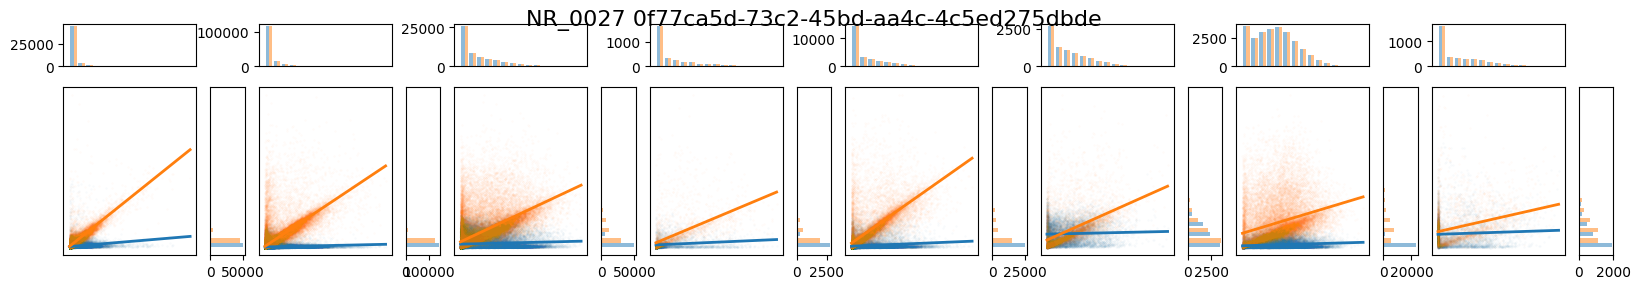

0f77ca5d-73c2-45bd-aa4c-4c5ed275dbde


In [13]:
concatenated_subsampled = np.array([])
paws = ['l_paw', 'r_paw']

for m, mat in enumerate(sessions_to_process[:1]):

    design_matrix = states_file.loc[states_file.session==mat]

    left_speeds = get_speed(design_matrix, design_matrix['Bin'], 'left', 60, split=False, feature='l_paw')
    right_speeds = get_speed(design_matrix, design_matrix['Bin'], 'right', 60, split=False, feature='r_paw')

    plot_all(design_matrix, left_speeds, right_speeds)
    print(mat)

    # # Create figure and grid
    # fig = plt.figure(figsize=(18, 4))
    # outer_gs = fig.add_gridspec(4, 16, wspace=0.4, hspace=0.3)
    # for e, epoch in enumerate(['Pre-quiescence', 'Quiescence', 'Choice', 'ITI']):
        
    #     # Each subplot block uses 4 columns
    #     col_start = e * 4
    #     col_end = col_start + 3

    #     main_ax = fig.add_subplot(outer_gs[1:4, col_start:col_end])
    #     x_hist = fig.add_subplot(outer_gs[0, col_start:col_end], sharex=main_ax)
    #     y_hist = fig.add_subplot(outer_gs[1:4, col_end], sharey=main_ax)

    #     # identifiable_states = np.array(design_matrix['identifiable_states'])
    #     epochs = np.array(design_matrix['broader_label'])
    #     hvor = np.where(epochs==epoch)[0]
    #     x = np.array(np.abs(design_matrix['avg_wheel_vel']))[hvor]
    #     y1 = left_speeds[1][hvor]
    #     y2 = right_speeds[1][hvor]

    #     # --- Scatter (two hues) ---
    #     main_ax.scatter(x, y1, alpha=0.3, s=.1, label='Left paw', color='C0')
    #     main_ax.scatter(x, y2, alpha=0.3, s=.1, label='Right paw', color='C1')

    #     # --- Fit and plot regression lines ---
    #     for x, y, color in [(x, y1, 'C0'), (x, y2, 'C1')]:
    #         slope, intercept = np.polyfit(x, y, 1)
    #         xs = np.linspace(x.min(), x.max(), 100)
    #         ys = slope * xs + intercept
    #         main_ax.plot(xs, ys, color=color, linewidth=2)

    #     # --- Marginal histograms ---
    #     x_hist.hist([x, x], bins=20, color=['C0', 'C1'], alpha=0.5)
    #     y_hist.hist([y1, y2], bins=20, color=['C0', 'C1'], alpha=0.5, orientation='horizontal')

    #     # Clean up axes
    #     # # x_hist.set_xticks([])
    #     # # y_hist.set_yticks([])

    #     # x_hist.set_xlim([])
    #     y_hist.set_ylim([0, 4000])
    #     plt.tight_layout()
    # main_ax.legend(loc='upper left')
    # plt.show()